<a href="https://colab.research.google.com/github/Saketsaurav4/Image-Classifier/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.   Setup



In [54]:
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1:Import TensorFlow: The line import tensorflow as tf imports the TensorFlow library, which is widely used for machine learning and deep learning tasks.

2:Import OS Module: The import os statement brings in the Python os module, allowing interaction with the operating system (e.g., navigating directories, managing files).

3:Mount Google Drive: drive.mount('/content/drive') connects your Google Drive to the Colab environment. After authorization, your Google Drive will be accessible at the specified path (/content/drive) within your Colab notebook.

In [55]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

1:tf.config.experimental.list_physical_devices('GPU'): This function returns a list of physical GPU devices available on your system. If you have a compatible GPU, it will be included in this list.

2:for gpu in gpus:: This loop iterates over each GPU in the list obtained from the previous step.

3:tf.config.experimental.set_memory_growth(gpu, True): For each GPU, this line sets memory growth to True. When memory growth is enabled, TensorFlow allocates only the GPU memory actually needed for runtime allocations. It starts with a small amount of memory and extends it as needed during training or inference.



#2.   Remove dodgy images



In [56]:
import cv2
import imghdr
from matplotlib import pyplot as plt

* import cv2: This line imports the OpenCV library, which is commonly used for computer vision tasks.

* imghdr: This module in Python is designed to determine the type of an image by examining the headers of the file itself. It supports various image formats, including JPEG, PNG, GIF, and others.

* from matplotlib import pyplot as plt: This imports the pyplot module from the matplotlib library, which is often used for creating plots and visualizations.

In [57]:
data_dir = '/content/drive/MyDrive/data'

This line assigns the path to a directory named “data” located in the Google Drive folder.

In [58]:
os.listdir(data_dir)

['sad', 'happy']

It returns the names of all items (files and subdirectories) present in the “data” directory.

In [59]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

This line defines a list of common image file extensions. These extensions represent different image formats.

In [60]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

image2.jpeg
image9.jpeg
image7.jpeg
image5.jpeg
image3.jpeg
image10.jpeg
image11.jpeg
image6.jpeg
image.jpeg
image4.jpeg
image8.jpeg
image20.jpeg
image16.jpeg
image13.jpeg
image12.jpeg
image19.jpeg
image14.jpeg
image17.jpeg
image18.jpeg
image21.jpeg
image15.jpeg
image30.jpeg
image29.jpeg
image25.jpeg
image28.jpeg
image26.jpeg
image27.jpeg
image24.jpeg
image33.jpeg
image22.jpeg
image23.jpeg
image31.jpeg
image32.jpeg
image37.jpeg
image41.jpeg
getty_91745128_333755.jpg
7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg
image40.jpeg
X2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvMzk3LW1ja2luc2V5LTIxYTI0MjUtamlyXzEucG5n.png
sad-people-vector-26812552.jpg
image36.jpeg
image42.png
image34.jpeg
X2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvay1zMzEtdGVuLTAyMi1qb2IyMi1sLWpvYjY1NS4ucG5n.png
Sad-man-sitting-in-bedroom-header.jpg
image39.jpeg
image35.jpeg
image38.jpeg
portrait-young-man-lonely-boring-sad-people-B2GTFD.jpg
sadness.jpg
960x0.jpg
depressed-person-standing-alone-bench_23-2150761438.jpg
HD-wallpaper-sad-and-alon-alone-box-mom-

This nested loop iterates over each subdirectory (representing an image class) in data_dir and then iterates over each file in the subdirectory, printing the name of each image file.

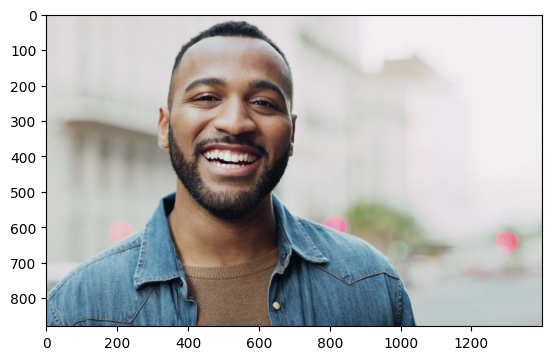

In [61]:
img =cv2.imread(os.path.join('/content/drive/MyDrive/data/happy/05-12-21-happy-people.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

This line reads an image from the specified path.The image is loaded into a numpy array (img), which represents pixel-level data.

* This code reads an image from a specified path and displays it using Matplotlib.

* cv2.imread reads the image in BGR format (default for OpenCV).

* cv2.cvtColor converts the image from BGR to RGB format, which is needed for correct display in Matplotlib.

In [62]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

 Iterating through classes and images:
* The outer loop iterates over each subdirectory in data_dir, representing different image classes.

* The inner loop iterates over each file in the current class directory.

 Constructing the image path:

* image_path is the full path to the current image.

 Reading and validating the image:

* cv2.imread(image_path) reads the image.

* imghdr.what(image_path) determines the image file type.

 Validating image extensions:

* If the determined file type (tip) is not in the list of allowed extensions (image_exts), the image is considered invalid and is deleted using os.remove(image_path).

 Exception handling:

* If there is any issue reading the image or determining its type, the exception is caught, and a message is printed. The problematic image is not removed in this case, but the relevant code is commented out (# os.remove(image_path)).



#3.    Load Data



In [63]:
import numpy as np
from matplotlib import pyplot as plt

These imports bring in necessary libraries for numerical operations (numpy), plotting (matplotlib)

In [64]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 304 files belonging to 2 classes.


* This function call creates a tf.data.Dataset object from the images stored in the specified directory.

* The directory structure should be organized with subdirectories for each class of images, such as:


>data

  >>class1
    
  >>* image1.jpg
  >>* image2.jpg

  >>class2
  
  >>* image3.jpg
  >>* image4.jpg


In [65]:
data_iterator = data.as_numpy_iterator()

* The as_numpy_iterator method converts the tf.data.Dataset object into an iterator that yields batches of data as NumPy arrays.

* This allows easy access to batches of images and labels for inspection or processing.

In [66]:
#Get another batch from the iterator
batch = data_iterator.next()

* The next method retrieves the next batch from the iterator.

* Each batch is a tuple of two elements: the first element is a batch of images, and the second element is the corresponding labels.

In [67]:
batch

(array([[[[238.      , 238.      , 238.      ],
          [238.      , 238.      , 238.      ],
          [238.      , 238.      , 238.      ],
          ...,
          [238.      , 238.      , 238.      ],
          [237.1875  , 237.1875  , 237.1875  ],
          [254.5625  , 254.5625  , 254.5625  ]],
 
         [[238.      , 238.      , 238.      ],
          [238.      , 238.      , 238.      ],
          [238.      , 238.      , 238.      ],
          ...,
          [238.      , 238.      , 238.      ],
          [237.1875  , 237.1875  , 237.1875  ],
          [254.5625  , 254.5625  , 254.5625  ]],
 
         [[238.      , 238.      , 238.      ],
          [238.      , 238.      , 238.      ],
          [238.      , 238.      , 238.      ],
          ...,
          [238.      , 238.      , 238.      ],
          [237.1875  , 237.1875  , 237.1875  ],
          [254.5625  , 254.5625  , 254.5625  ]],
 
         ...,
 
         [[238.      , 238.      , 238.      ],
          [238.   

In [68]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

* batch[0] contains the images in the batch.

* Calling .shape on this array gives the shape of the image batch, typically in the form (batch_size, height, width, channels).

* This tells you the number of images in the batch and their dimensions.

In [69]:
#Class 1 = SAD Image
#Class 0 = HAPPY Image
batch[1]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

* batch[1] contains the labels corresponding to the images.

* Each label is an integer representing the class of the image.

* The comment indicates the meaning of the labels: 1 for "SAD" images and 0 for "HAPPY" images.

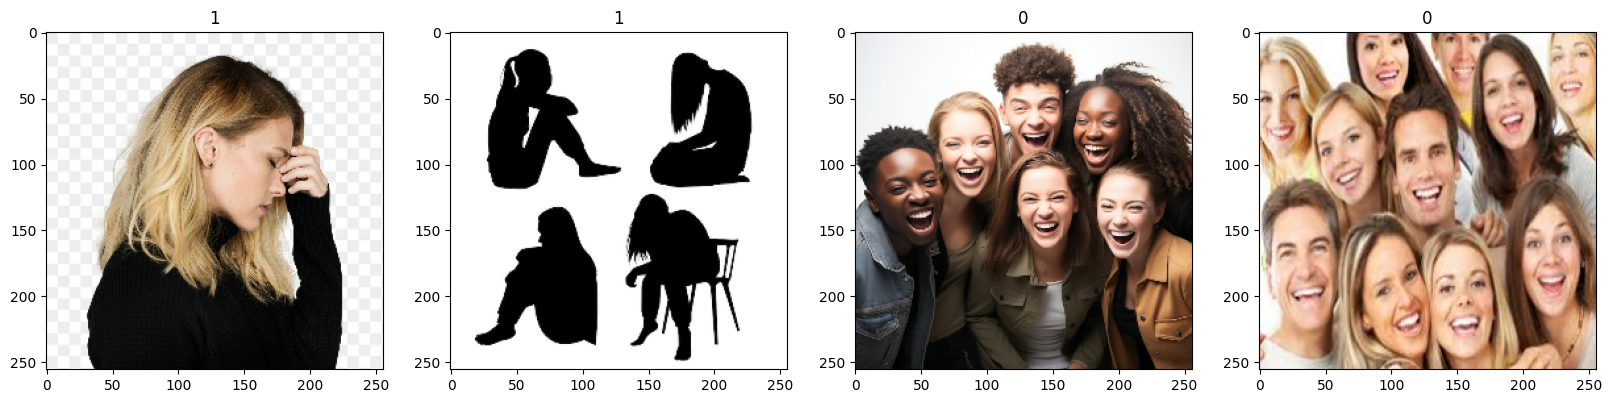

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

* fig, ax = plt.subplots(ncols=4, figsize=(20,20)) creates a figure with 4 columns for displaying images.

* enumerate(batch[0][:4]) loops through the first 4 images in the batch.

* ax[idx].imshow(img.astype(int)) displays the image in the respective subplot. img.astype(int) converts the image array to integer type for proper display.

* ax[idx].title.set_text(batch[1][idx]) sets the title of each subplot to the corresponding label.

#4. Scale Data

In [71]:
data = data.map(lambda x,y: (x/255, y))

* This normalizes the image data by dividing the pixel values by 255, converting them from the range [0, 255] to the range [0, 1].

* data.map(lambda x,y: (x/255, y)) applies this normalization to the entire dataset using a lambda function.

* x represents the image data, and y represents the labels.

In [72]:
data.as_numpy_iterator().next()

(array([[[[0.8472656 , 0.84334403, 0.82765776],
          [0.8509804 , 0.84705883, 0.83137256],
          [0.8509804 , 0.84705883, 0.83137256],
          ...,
          [0.9411765 , 0.93333334, 0.94509804],
          [0.9411765 , 0.93333334, 0.94509804],
          [0.9411765 , 0.93333334, 0.94509804]],
 
         [[0.8472656 , 0.84334403, 0.82765776],
          [0.8509804 , 0.84705883, 0.83137256],
          [0.8509804 , 0.84705883, 0.83137256],
          ...,
          [0.9411765 , 0.93333334, 0.94509804],
          [0.9411765 , 0.93333334, 0.94509804],
          [0.9411765 , 0.93333334, 0.94509804]],
 
         [[0.8472656 , 0.84334403, 0.82765776],
          [0.8509804 , 0.84705883, 0.83137256],
          [0.8509804 , 0.84705883, 0.83137256],
          ...,
          [0.9411765 , 0.93333334, 0.94509804],
          [0.9411765 , 0.93333334, 0.94509804],
          [0.9411765 , 0.93333334, 0.94509804]],
 
         ...,
 
         [[0.3617923 , 0.54522085, 0.6263077 ],
          [0.41376

* This retrieves the next batch of normalized images and labels from the dataset as a NumPy array.

* It's useful for inspecting the normalized data.

In [73]:
len(data)

10

#5. Split Data

In [74]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


* 70% of the dataset will be used for training the model.

*  20% of the dataset will be used for validation, typically for tuning hyperparameters and monitoring the model's performance during training.

* 10% of the dataset will be used for evaluating the final performance of the trained model.

In [75]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Training Set:

* This line creates the training set by taking the first train_size samples from the original dataset data.

* The take() method selects the specified number of samples from the dataset.

Validation Set:

* This line creates the validation set by skipping the first train_size samples (already included in the training set) and then taking the next val_size samples from the remaining dataset.

* The skip() method skips the specified number of samples from the dataset before taking the next samples using the take() method.

Test Set:

* This line creates the test set by skipping the first train_size + val_size samples (already included in the training and validation sets) and then taking the next test_size samples from the remaining dataset.

#6. Build Deep Learning Model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

These lines import essential modules from TensorFlow's Keras API:

* Sequential: A type of model that allows stacking layers sequentially.

* Conv2D: Convolutional layer for 2D spatial convolution.

* MaxPooling2D: Max pooling operation for spatial data.

* Dense: Fully connected layer.

* Flatten: Layer to flatten input.

* Dropout: Regularization technique to prevent overfitting by randomly dropping units during training.

In [77]:
model = Sequential()

This line initializes a sequential model, which allows stacking layers sequentially.

In [78]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

These lines add convolutional layers to the model.

* Each Conv2D layer represents a convolutional layer with specific parameters:
 >The first argument (16, 32, etc.) represents the number of filters or kernels.

 >The second argument ((3,3)) specifies the size of the kernel.

 >The third argument (1) represents the stride for the convolution operation.

 >The activation parameter specifies the activation function, which introduces non-linearity into the model.

* The input_shape parameter is only needed in the first layer to specify the shape of the input data. Here, (256, 256, 3) represents an input image with a height and width of 256 pixels and 3 color channels (RGB).

Adding MaxPooling Layers:

* These lines add max-pooling layers to the model.

* Max pooling reduces the spatial dimensions of the feature maps, helping to reduce computational complexity and control overfitting.

Flattening Layer:

* This line adds a flattening layer to the model.

* The flattening layer converts the multi-dimensional feature maps into a one-dimensional vector, which can be fed into a fully connected (dense) layer.

Adding Dense Layers:

* These lines add dense layers to the model.

* Dense layers are fully connected layers where each neuron is connected to every neuron in the previous layer.

*The last Dense layer has a single neuron and uses the sigmoid activation function, suitable for binary classification tasks where the output represents the probability of belonging to a class.

In [79]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

* This line compiles the model for training.

* 'adam' specifies the Adam optimizer, which is a popular optimization algorithm used for training deep learning models.

* loss=tf.losses.BinaryCrossentropy() sets the loss function for the model. In this case, it uses binary cross-entropy, suitable for binary classification problems.

* metrics=['accuracy'] specifies the evaluation metric to be used during training. Here, it monitors accuracy, which measures the fraction of correctly classified images.

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

* This line prints a summary of the model architecture, including the number of parameters in each layer and the total number of trainable parameters.


* The summary provides a concise overview of the model's structure, which is helpful for understanding its complexity and ensuring it matches the intended design.


#7. Train

In [81]:
logdir='logs'

logdir = 'logs' specifies the directory where TensorBoard logs will be stored.

In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

tf.keras.callbacks.TensorBoard(log_dir=logdir) creates a callback for TensorBoard logging, which will visualize training metrics and model graphs.

In [83]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 21s 2s/step - loss: 0.8249 - accuracy: 0.5491 - val_loss: 0.6060 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 18s 2s/step - loss: 0.6058 - accuracy: 0.6518 - val_loss: 0.6021 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.4860 - accuracy: 0.8438 - val_loss: 0.4812 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: 0.4059 - accuracy: 0.8170 - val_loss: 0.2511 - val_accuracy: 0.9375
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.2894 - accuracy: 0.8884 - val_loss: 0.1387 - val_accuracy: 0.9688
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.2276 - accuracy: 0.9241 - val_loss: 0.1738 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 18s 2s/step - loss: 0.1587 - accuracy: 0.9464 - val_loss: 0.2545 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

This code trains the model using the training dataset train for 20 epochs, with validation data val. The callbacks parameter allows specifying callbacks to be used during training, in this case, the TensorBoard callback.


#8. Plot Performance

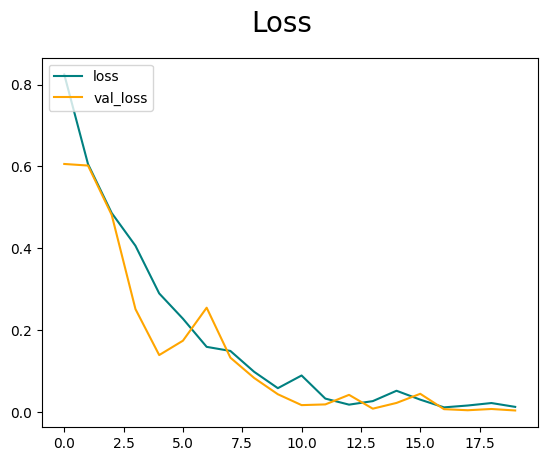

In [84]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


Creating the Figure:

* This line creates a new figure for plotting.

Plotting Training and Validation Loss:

* plt.plot() is used to plot the training and validation loss.

* hist.history['loss'] retrieves the training loss values from the History object (hist).

* hist.history['val_loss'] retrieves the validation loss values from the History object.

* color='teal' and color='orange' specify the colors of the lines for training and validation loss, respectively.

* The label parameter assigns labels to the lines, which will be used in the legend.

Setting Title and Legend:

* fig.suptitle() sets the title of the figure to "Loss" with a font size of 20.

* plt.legend() displays the legend on the plot. The loc="upper left" parameter specifies the position of the legend in the upper-left corner of the plot.

Displaying the Plot:

* This line displays the plot with the configured settings.


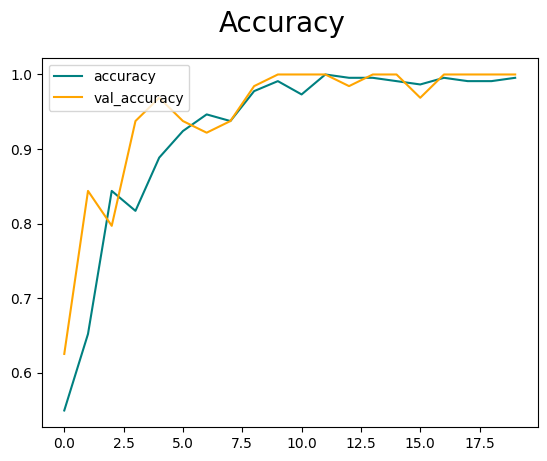

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Creating the Figure:

* This line creates a new figure for plotting.

Plotting Training and Validation Accuracy:

* plt.plot() is used to plot the training and validation accuracy.

* hist.history['accuracy'] retrieves the training accuracy values from the History object (hist).

* hist.history['val_accuracy'] retrieves the validation accuracy values from the History object.

* color='teal' and color='orange' specify the colors of the lines for training and validation accuracy, respectively.

* The label parameter assigns labels to the lines, which will be used in the legend.

Setting Title and Legend:

* fig.suptitle() sets the title of the figure to "Accuracy" with a font size of 20.

* plt.legend() displays the legend on the plot. The loc="upper left" parameter specifies the position of the legend in the upper-left corner of the plot.

Displaying the Plot:

* This line displays the plot with the configured settings.

#9. Evaluate

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

These lines import the following metrics from TensorFlow's Keras API:

* Precision: This metric measures the ability of the model to correctly identify positive samples out of all the samples it has predicted as positive. It is calculated as the ratio of true positives to the sum of true positives and false positives.

* Recall: This metric measures the ability of the model to correctly identify positive samples out of all the actual positive samples in the dataset. It is calculated as the ratio of true positives to the sum of true positives and false negatives.

* BinaryAccuracy: This metric calculates the accuracy of the model in binary classification tasks. It is calculated as the ratio of the number of correct predictions to the total number of predictions made by the model.

In [87]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

Three metric objects are created:
* pre: Instance of the Precision metric.
* re: Instance of the Recall metric.
* acc: Instance of the BinaryAccuracy metric.

In [88]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 476ms/step


Iterating Over Test Dataset Batches:

* This loop iterates over batches of data from the test dataset (test), accessed through its numpy iterator (test.as_numpy_iterator()).

* Each batch contains input data (X) and corresponding true labels (y).

Making Predictions:

* For each batch, input data (X) and true labels (y) are extracted.
Predictions (yhat) are obtained from the model using the predict() method.

* These predictions represent the model's output probabilities for each input sample.

Updating Metric States:

* The update_state() method of each metric object (pre, re, acc) is called to update their states based on the true labels (y) and predicted labels (yhat).

* This process involves incorporating the new predictions into the metrics' calculations, such as updating counts of true positives, false positives, true negatives, and false negatives, depending on the metric.

Updating Metric States:

* The update_state() method of each metric object (pre, re, acc) is called to update their states based on the true labels (y) and predicted labels (yhat).

* This process involves incorporating the new predictions into the metrics' calculations, such as updating counts of true positives, false positives, true negatives, and false negatives, depending on the metric.

In [89]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.800000011920929, Accuracy:0.9375


* pre.result().numpy(): This retrieves the current value of precision as a NumPy array. The result() method gets the current value of the metric, and numpy() converts it into a NumPy array for printing.

* re.result().numpy(): Similarly, this retrieves the current value of recall as a NumPy array.

* acc.result().numpy(): This retrieves the current value of accuracy as a NumPy array.

#10. Test

In [90]:
import cv2

cv2 is the OpenCV library for computer vision tasks in Python

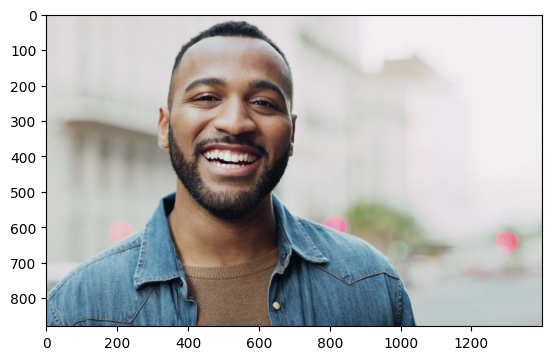

In [91]:
img = cv2.imread('/content/drive/MyDrive/data/happy/05-12-21-happy-people.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Reading an Image:

* cv2.imread() is an OpenCV function used to read an image from a file.

Converting Color Space:

* cv2.cvtColor() is an OpenCV function used to convert the color space of an image.

* In this case, it converts the BGR (Blue-Green-Red) color space (used by OpenCV) to the RGB (Red-Green-Blue) color space (used by Matplotlib).

Displaying the Image:

* plt.imshow() is a Matplotlib function used to display images.

* The converted image (from BGR to RGB) is passed as input to plt.imshow().

* plt.show() is used to display the image in a Matplotlib figure.

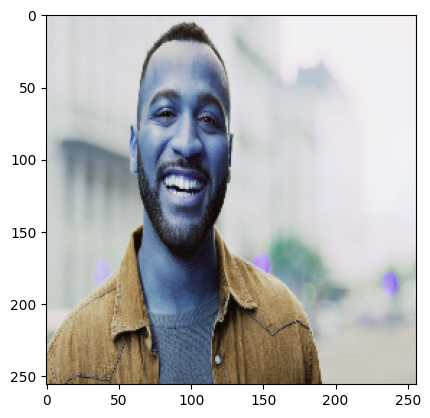

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

Resizing the Image with TensorFlow:

* tf.image.resize() is a function from TensorFlow's image processing module.

* It resizes the input image (img) to the specified dimensions (256, 256).

Displaying the Resized Image with Matplotlib:

* plt.imshow() is a Matplotlib function used to display images.

* The resized image is passed as input to plt.imshow().

* .numpy() converts the resized image from a TensorFlow tensor to a NumPy array.

* .astype(int) converts the pixel values of the image from float to integer
 type. Matplotlib expects pixel values to be integers when displaying images.

* plt.show() is used to display the resized image in a Matplotlib figure.

In [93]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


Resizing and Preprocessing the Image:

* resize is the resized image obtained from TensorFlow's image processing module.

* /255 scales the pixel values of the image to the range [0,1] by dividing each pixel value by 255.

* np.expand_dims() is a function from NumPy that expands the dimensions of an array.

* The 0 argument passed to np.expand_dims() indicates that the new axis should be added at position 0, effectively creating a batch dimension.

* The result is a NumPy array representing the preprocessed image with an additional batch dimension.

Making Predictions:

* model.predict() is a method used to obtain predictions from a trained Keras model.

* The preprocessed image is passed as input to model.predict() to obtain the model's prediction.

* The result (yhat) contains the model's output, typically representing the predicted class probabilities.

In [94]:
yhat

array([[0.01499488]], dtype=float32)

yhat contains the output of the model's predictions for the input image

In [95]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Thresholding the Prediction:

* This condition checks if the value of yhat (the model's prediction) is greater than 0.5.

* In binary classification tasks, where yhat represents the probability of the positive class, a threshold of 0.5 is commonly used to determine the predicted class.

* If yhat is greater than 0.5, it implies that the model predicts the positive class (e.g., "Sad" in this case), and the subsequent code block is executed.

Printing Predicted Class:

* If the condition is met (i.e., yhat > 0.5), indicating that the model predicts the positive class, "Sad" is printed as the predicted class.


Else Statement:

* If the condition specified in the if statement is not met (i.e., yhat <= 0.5), the code inside the else block is executed.

* This implies that the model's prediction is below the threshold, indicating the negative class ("Happy" in this case).

Printing Predicted Class (in Else Block):

* If the condition is not met (i.e., yhat <= 0.5), indicating that the model predicts the negative class, "Happy" is printed as the predicted class.

#11. Save the Model

In [96]:
from tensorflow.keras.models import load_model

* The load_model function is commonly used when you want to reuse a trained neural network model that you've previously saved.

* It allows you to load the model architecture, weights, and any additional configuration saved during training.

In [97]:
model.save(os.path.join('models','imageclassifier'))

* This code saves the trained model to a specified directory.

* Saving the model allows you to persist it to disk for future use without having to retrain it.

In [98]:
new_model = load_model(os.path.join('models','imageclassifier'))

* This code loads a previously saved model from a specified directory.

* Loading the model allows you to reuse a trained model that was previously saved to disk.

In [99]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 109ms/step


Resizing and Normalizing the Image:

* The resize variable contains the resized image, likely with pixel values in the range [0, 255].

* Dividing by 255 scales the pixel values to the range [0, 1], which is a common normalization step in image preprocessing for neural networks.

Expanding Dimensions:

* np.expand_dims() is a function from NumPy that adds an extra dimension to the array.

* The second argument 0 specifies that the new dimension should be added at position 0.

* This is done to create a batch dimension, converting the shape of resize/255 from (256, 256, 3) to (1, 256, 256, 3).

* Neural network models typically expect input data to have a batch dimension, even if you are predicting on a single image.

Making Predictions:

* new_model.predict() is a method to obtain predictions from the Keras model.

* The method takes the preprocessed image (with expanded dimensions) as input and returns the model's predictions.

* The result yhatnew contains the output of the model for the input image.


In [100]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Thresholding the Prediction:

* This condition checks if the value of yhatnew (the model's prediction) is greater than 0.5.

* In binary classification tasks, yhatnew typically represents the probability of the positive class (e.g., "Sad").

* A threshold of 0.5 is commonly used to determine the predicted class. If yhatnew is greater than 0.5, the model predicts the positive class.

Printing Predicted Class for Positive Case:

* If the condition (yhatnew > 0.5) is true, indicating that the model predicts the positive class, this line prints "Predicted class is Sad".

* This provides a human-readable interpretation of the model's prediction.

Else Statement:

* If the condition specified in the if statement is not met (i.e., yhatnew <= 0.5), the code inside the else block is executed.

* This implies that the model's prediction is below or equal to the threshold, indicating the negative class.

Printing Predicted Class for Negative Case:

* If the condition is not met, indicating that the model predicts the negative class, this line prints "Predicted class is Happy".

* This provides a human-readable interpretation of the model's prediction.


